In [ ]:
## import some important package...

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
%matplotlib inline

### (1) Data Reading

In [2]:
os.chdir(r"C:\Users\Jayant kr. Mishra\Downloads")

In [3]:
tx = pd.read_csv("TaxiFare.csv")

In [4]:
# we have 50000 rows and 8 columns
tx.shape

(50000, 8)

In [5]:
tx.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


### Dataset information

##### unique_id=               A unique identifier or key for each record in the dataset
##### date_time_of_pickup=     The time when the ride started
##### longitude_of_pickup=     Longitude of the taxi ride pickup point
##### latitude_of_pickup=      Latitude of the taxi ride pickup point
##### longitude__of_dropoff=   Longitude of the taxi ride dropoff point
##### latitude_of_dropoff=     Latitude of the taxi ride dropoff
##### point no_of_passenger=   count of the passengers during the ride
##### Amount=                  (target variable) dollar amount of the cost of the taxi ride

### Problem Statement:

##### To predict the fare of the taxi ride using Random Forest given pickup and drop-off locations, the pickup timestamp, and the passenger count...

### (2) Data Preparation

In [6]:
## we have object float and int variable
tx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [7]:
tx["amount"].describe() 

count    50000.000000
mean        11.364171
std          9.685557
min         -5.000000
25%          6.000000
50%          8.500000
75%         12.500000
max        200.000000
Name: amount, dtype: float64

#### Describe the data

In [8]:
tx.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734371,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [9]:
tx[tx["no_of_passenger"]==0] ## may be Goods transport from one location to other location because amount is paid.

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
314,16:15.0,34.0,2015-06-02 23:16:15 UTC,-73.974899,40.751095,-73.908546,40.881878,0
566,33:18.0,4.9,2012-01-28 21:33:18 UTC,-73.955322,40.782840,-73.955797,40.773673,0
678,24:20.0,6.5,2012-02-27 07:24:20 UTC,-73.983397,40.738183,-73.971395,40.758023,0
1160,58:48.0,13.3,2011-05-25 23:58:48 UTC,-73.998360,40.740348,-73.946455,40.777348,0
1935,09:28.0,10.1,2011-10-23 11:09:28 UTC,-73.971400,40.795000,-73.967900,40.768600,0
...,...,...,...,...,...,...,...,...
47372,57:10.0,15.7,2012-04-03 22:57:10 UTC,-73.988813,40.731228,-73.954773,40.733567,0
47401,41:22.0,9.7,2012-03-08 12:41:22 UTC,-73.991375,40.732217,-73.976507,40.758900,0
47920,45:00.0,5.3,2012-03-11 18:45:00 UTC,-73.966112,40.794478,-73.953933,40.787287,0
48118,56:28.0,8.1,2011-03-25 19:56:28 UTC,-73.973382,40.743915,-73.948883,40.777647,0


In [10]:
tx[tx["amount"]==2.5] ## minimum charges of texi in New Yark(NY)is 2.5$

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
226,51:00.0,2.5,2012-03-29 03:51:00 UTC,-73.989142,40.720105,-73.988777,40.720662,1
376,57:22.0,2.5,2014-05-29 05:57:22 UTC,0.000000,0.000000,0.000000,0.000000,1
472,48:00.0,2.5,2009-02-22 22:48:00 UTC,0.000000,0.000000,-74.005433,40.726685,2
503,10:00.0,2.5,2010-01-19 01:10:00 UTC,-73.998720,40.624708,-73.998720,40.624708,1
657,50:21.0,2.5,2009-08-25 01:50:21 UTC,-73.986410,40.763350,-73.986410,40.763350,1
...,...,...,...,...,...,...,...,...
48879,49:00.0,2.5,2009-07-07 14:49:00 UTC,-74.013322,40.712017,-74.013322,40.712017,1
49292,22:20.0,2.5,2015-01-05 07:22:20 UTC,0.000000,0.000000,0.000000,0.000000,1
49360,33:05.0,2.5,2009-11-18 14:33:05 UTC,-73.987698,40.764281,-73.968984,40.760550,2
49528,40:00.0,2.5,2009-02-21 15:40:00 UTC,-73.981853,40.774242,-73.981827,40.774230,2


In [11]:
tx[tx["amount"]<2.5] 

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
2039,37:10.0,-2.90,2010-03-09 23:37:10 UTC,-73.789450,40.643498,-73.788665,40.641952,1
2486,14:27.0,-2.50,2015-03-22 05:14:27 UTC,-74.000031,40.720631,-73.999809,40.720539,1
2780,38:41.0,0.01,2015-05-01 15:38:41 UTC,-73.939041,40.713963,-73.941673,40.713997,1
10002,26:01.0,0.00,2010-02-15 14:26:01 UTC,-73.987115,40.738808,-74.005911,40.713960,1
13032,57:10.0,-3.00,2013-08-30 08:57:10 UTC,-73.995062,40.740755,-73.995885,40.741357,4
27891,40:28.0,0.00,2015-05-15 21:40:28 UTC,-74.077927,40.805714,-74.077919,40.805721,1
28839,39:10.0,-2.50,2013-08-11 13:39:10 UTC,-73.785260,40.648442,0.000000,0.000000,1
36722,19:45.0,-2.50,2015-04-30 15:19:45 UTC,-73.952187,40.790112,-73.950043,40.792839,1
42337,29:46.0,-5.00,2015-03-09 10:29:46 UTC,-73.990974,40.755985,-73.980820,40.759869,1
47302,13:39.0,0.00,2010-03-18 19:13:39 UTC,-73.942346,40.806269,-73.942463,40.806129,1


In [12]:
index_names = tx[tx["amount"]<2.5].index # we dropped it because the charge of taxi in new york can never be less than 2.5

In [13]:
index_names

Int64Index([2039, 2486, 2780, 10002, 13032, 27891, 28839, 36722, 42337, 47302], dtype='int64')

#### Taxi fare amount can never be negative, also the charge of taxi can never be less than 2.5 in New York so dropping them. 

In [14]:
tx.drop(index_names,inplace=True)

#### checking the presence of null value in our dataset

In [15]:
tx.isnull().sum() # Not present anu null value 

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

#### Checking the Presence of Outliers in Dataset

In [16]:
tx.describe(percentiles = [0.01,.02,.03,.04,.05,.1,.25,.4,.5,.75,.9,.95,.96,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,40%,50%,75%,90%,95%,96%,98%,99%,max
amount,49990.0,11.366813,9.684697,2.500000,3.300000,3.500000,3.700000,4.000000,4.100000,4.500000,6.000000,7.300000,8.500000,12.500000,20.500000,30.500000,33.566400,46.500000,52.000000,200.000000
longitude_of_pickup,49990.0,-72.509468,10.394880,-75.423848,-74.014436,-74.010456,-74.008734,-74.007742,-74.006816,-74.002780,-73.992062,-73.985837,-73.981840,-73.967155,-73.950996,-73.871348,-73.862870,-73.137393,0.000000,40.783472
latitude_of_pickup,49990.0,39.933598,6.225469,-74.006893,0.000000,40.578523,40.645443,40.681107,40.702132,40.717985,40.734883,40.746855,40.752679,40.767360,40.779778,40.787795,40.790614,40.799604,40.807129,401.083332
longitude_of_dropoff,49990.0,-72.505803,10.403539,-84.654241,-74.015120,-74.011755,-74.009840,-74.008284,-74.007275,-74.002710,-73.991152,-73.984217,-73.980082,-73.963588,-73.944750,-73.873280,-73.864201,-73.434436,0.000000,40.851027
latitude_of_dropoff,49990.0,39.926903,6.012677,-74.006377,0.000000,40.569767,40.646891,40.672764,40.686076,40.713277,40.734375,40.747609,40.753373,40.768166,40.782897,40.794074,40.798798,40.810249,40.832503,43.415190
no_of_passenger,49990.0,1.667914,1.289250,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,4.000000,5.000000,5.000000,5.000000,6.000000,6.000000


In [17]:
# latitude and longitude geographical coordinate system 
tx["X1"] = tx["latitude_of_pickup"]
tx["X2"] = tx["latitude_of_dropoff"]
tx["Y1"] = tx["longitude_of_pickup"]
tx["Y2"] = tx["longitude_of_dropoff"]

In [18]:
tx["Distance_Travel"] = np.sqrt((np.square(tx["X1"]-tx["X2"]))+(np.square(tx["Y1"]-tx["Y2"])))

In [19]:
tx.head(1)

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,X1,X2,Y1,Y2,Distance_Travel
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.84161,40.712278,1,40.721319,40.712278,-73.844311,-73.84161,0.009436


#### We have used the Euclidean Distance formula to calculate the distance.

In [20]:
tx1=tx.drop(columns=["longitude_of_pickup","latitude_of_pickup","longitude_of_dropoff","latitude_of_dropoff"])

In [21]:
tx1[["date","Time","Zone"]]=tx1["date_time_of_pickup"].str.split(pat=" ",n=-1 , expand=True)
#splitting the date_time_of_pickup in separate columns.

In [22]:
tx1.head(2)

,unique_id,amount,date_time_of_pickup,no_of_passenger,X1,X2,Y1,Y2,Distance_Travel,date,Time,Zone
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,1,40.721319,40.712278,-73.844311,-73.841610,0.009436,2009-06-15,17:26:21,UTC
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,1,40.711303,40.782004,-74.016048,-73.979268,0.079696,2010-01-05,16:52:16,UTC


In [23]:
tx2 = tx1.copy()

In [24]:
tx2.describe(percentiles = [0.01,.02,.03,.04,.05,.1,.25,.4,.5,.75,.9,.95,.96,.98,.99]).T.tail(2)

,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,40%,50%,75%,90%,95%,96%,98%,99%,max
Y2,49990.0,-72.505803,10.403539,-84.654241,-74.01512,-74.011755,-74.009840,-74.008284,-74.007275,-74.00271,-73.991152,-73.984217,-73.980082,-73.963588,-73.944750,-73.873280,-73.864201,-73.434436,0.000000,40.851027
Distance_Travel,49990.0,0.189575,3.838982,0.000000,0.00000,0.000000,0.000019,0.002763,0.004374,0.00736,0.012475,0.017534,0.021502,0.038681,0.070274,0.112406,0.122447,0.195029,0.228219,360.304405


In [25]:
## Outlier Treatment
tx2["amount"] = np.where(tx2["amount"]>=52, 52, tx2["amount"])
tx2["no_of_passenger"] = np.where(tx2["no_of_passenger"]>=5, 4, tx2["no_of_passenger"])
tx2["Distance_Travel"] = np.where(tx2["Distance_Travel"]>=0.228242, 0.228242, tx2["Distance_Travel"])

In [26]:
tx2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49990 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   unique_id            49990 non-null  object 
 1   amount               49990 non-null  float64
 2   date_time_of_pickup  49990 non-null  object 
 3   no_of_passenger      49990 non-null  int64  
 4   X1                   49990 non-null  float64
 5   X2                   49990 non-null  float64
 6   Y1                   49990 non-null  float64
 7   Y2                   49990 non-null  float64
 8   Distance_Travel      49990 non-null  float64
 9   date                 49990 non-null  object 
 10  Time                 49990 non-null  object 
 11  Zone                 49990 non-null  object 
dtypes: float64(6), int64(1), object(5)
memory usage: 5.0+ MB


In [27]:
#Changig the type from object to datetime.
tx2["date"] = pd.to_datetime(tx2["date"])
tx2["date_time_of_pickup"] = pd.to_datetime(tx2["date_time_of_pickup"])

In [28]:
tx2["hours"] = tx2["date_time_of_pickup"].dt.hour
tx2["min"] = tx2["date_time_of_pickup"].dt.minute
tx2["second"] = tx2["date_time_of_pickup"].dt.second
tx2["year"] = tx2["date_time_of_pickup"].dt.year
tx2["day_of_the_month"] = tx2["date_time_of_pickup"].dt.day
#Extracting some features from date_time_of_pickup

In [29]:
def time_of_day(x):
    if x in range(6,12):
        return "Morning"
    elif x in range(12,17):
        return "Afternoon"
    elif x in range(17,21):
        return "Evening"
    else:
        return "Night"

In [30]:
tx2["time_of_day"] = tx2["hours"].apply(time_of_day)

In [31]:
tx2["day"] = tx2["date_time_of_pickup"].dt.day_name()
tx2["day_no"] = tx2["date_time_of_pickup"].dt.weekday

In [32]:
# Remove latitude and longtiude outliers
tx2 = tx2.loc[tx2['X1'].between(40, 42)]
tx2 = tx2.loc[tx2['Y1'].between(-75, -72)]
tx2 = tx2.loc[tx2['X2'].between(40, 42)]
tx2 = tx2.loc[tx2['Y2'].between(-75, -72)]
print(f'New number of observations: {tx2.shape[0]}')


New number of observations: 48944


In [33]:
tx2.describe(percentiles = [0.01,.02,.03,.04,.05,.1,.25,.4,.5,.75,.9,.95,.96,.98,.99]).T.head(6)

,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,40%,50%,75%,90%,95%,96%,98%,99%,max
amount,48944.0,11.250773,8.957200,2.500000,3.300000,3.700000,3.700000,4.000000,4.100000,4.500000,6.000000,7.300000,8.500000,12.500000,20.500000,30.500000,33.500000,45.830000,52.000000,52.000000
no_of_passenger,48944.0,1.560416,0.998081,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
X1,48944.0,40.751123,0.030840,40.121653,40.645372,40.679969,40.701312,40.706275,40.709626,40.720476,40.736520,40.747812,40.753445,40.767764,40.780060,40.788026,40.790848,40.799787,40.807240,41.650000
X2,48944.0,40.751579,0.033586,40.164927,40.646754,40.672027,40.685010,40.693557,40.703022,40.716909,40.735906,40.748538,40.754120,40.768484,40.783132,40.794545,40.799187,40.810553,40.833572,41.543217
Y1,48944.0,-73.975147,0.039726,-74.711648,-74.014462,-74.010528,-74.008787,-74.007831,-74.006881,-74.002956,-73.992300,-73.986186,-73.982121,-73.968397,-73.953514,-73.933419,-73.893912,-73.862785,-73.786137,-72.856968
Y2,48944.0,-73.973989,0.038647,-74.755480,-74.015149,-74.011887,-74.009912,-74.008382,-74.007378,-74.002877,-73.991333,-73.984562,-73.980480,-73.965322,-73.948664,-73.922159,-73.907867,-73.862453,-73.795930,-72.854940


##### Manhattan

In [46]:
# function
def minkowski_distance(x1, x2, y1, y2, p):
    return ((abs(x2 - x1) ** p) + (abs(y2 - y1)) ** p) ** (1 / p)


#### Using Manhattan Distance

In [47]:
tx2['manhattan_d'] = minkowski_distance(tx2['Y1'], 
                                       tx2['Y2'],
                                       tx2['X1'],
                                       tx2['X2'], 1)


#### Graphical Analysis

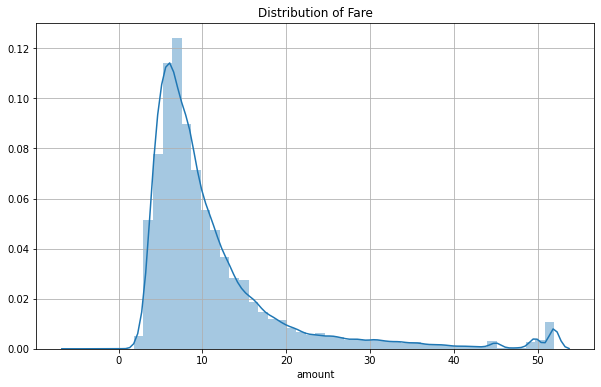

In [48]:
## amount is normalize...
plt.figure(figsize = (10, 6))
sns.distplot(tx2['amount']);
plt.title('Distribution of Fare')
plt.grid()
plt.savefig('Distribution of Fare.jpg')

In [46]:
var=tx2.pivot_table(index='hours', columns='year', values="amount",aggfunc="mean")
var.head()

year,2009,2010,2011,2012,2013,2014,2015
hours,,,,,,,
0,10.678237,10.121852,10.915584,11.478135,12.148226,14.608251,15.289630
1,10.275422,10.288832,10.638158,12.199597,13.024562,12.030086,13.037660
2,9.840268,9.470056,9.548521,11.545342,12.980162,12.839934,12.097746
3,10.136232,10.726230,10.589063,11.645033,12.169224,14.546777,13.224000
4,12.457700,13.559684,13.739362,13.183133,14.231809,13.722024,15.000667


#### creating line plot for each and every hour and for each and every year...

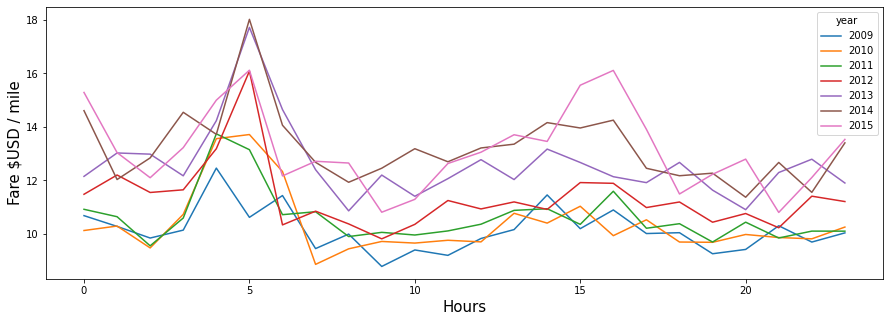

In [45]:
## we can see that year by comparision price is high and in a year peak hour he price is normal.. 
tx2.pivot_table(index='hours', columns='year', values="amount",aggfunc="mean").plot(figsize=(15,5))
plt.xlabel("Hours",fontsize=(15))
plt.ylabel('Fare $USD / mile',fontsize=(15))
plt.savefig('Fare $USD_mile.jpg')


In [48]:
tx2.head(4)

,unique_id,amount,date_time_of_pickup,no_of_passenger,X1,X2,Y1,Y2,Distance_Travel,date,Time,Zone,hours,min,second,year,day_of_the_month,time_of_day,day,day_no
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,1,40.721319,40.712278,-73.844311,-73.841610,0.009436,2009-06-15,17:26:21,UTC,17,26,21,2009,15,Evening,Monday,0
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,1,40.711303,40.782004,-74.016048,-73.979268,0.079696,2010-01-05,16:52:16,UTC,16,52,16,2010,5,Afternoon,Tuesday,1
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,2,40.761270,40.750562,-73.982738,-73.991242,0.013674,2011-08-18,00:35:00,UTC,0,35,0,2011,18,Night,Thursday,3
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,1,40.733143,40.758092,-73.987130,-73.991567,0.025340,2012-04-21,04:30:42,UTC,4,30,42,2012,21,Night,Saturday,5


In [49]:
## Average fare charge
tx2.groupby(tx2["time_of_day"]).agg({"amount":["mean"]}) 

,amount
,mean
time_of_day,
Afternoon,11.729643
Evening,10.865916
Morning,10.858767
Night,11.494612


<AxesSubplot:xlabel='time_of_day'>

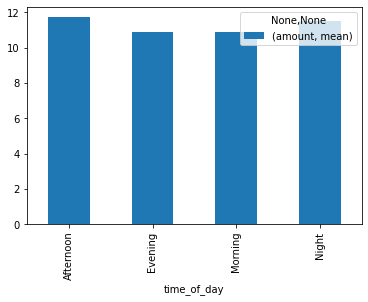

In [52]:
tx2.groupby(tx2["time_of_day"]).agg({"amount":["mean"]}).plot(kind='bar')

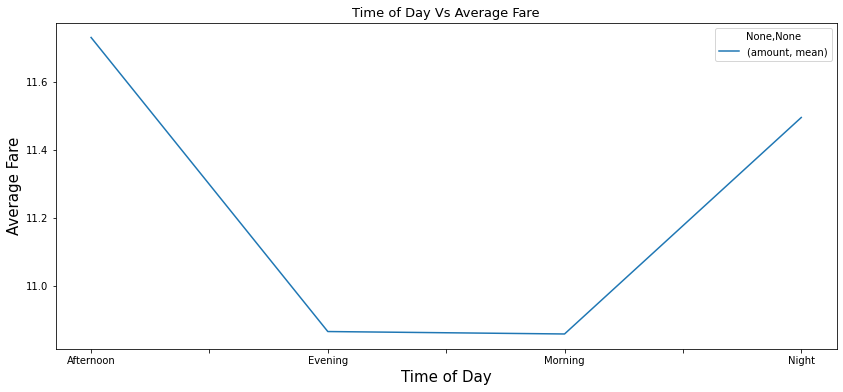

In [53]:
## Average charges is high in Afternoon and night time
tx2.groupby(tx2["time_of_day"]).agg({"amount":["mean"]}).plot(figsize=(14,6))
plt.title("Time of Day Vs Average Fare",fontsize=(13))
plt.xlabel("Time of Day",fontsize=(15))
plt.ylabel('Average Fare',fontsize=(15))
plt.savefig("Time_of_Day_vs_Average_Fare.jpg")

In [65]:
tx2.groupby(tx2["day"]).agg({"amount":["mean"]}) 

,amount
,mean
day,
Friday,11.262035
Monday,11.454932
Saturday,11.050456
Sunday,11.425765
Thursday,11.509171
Tuesday,11.098784
Wednesday,10.984002


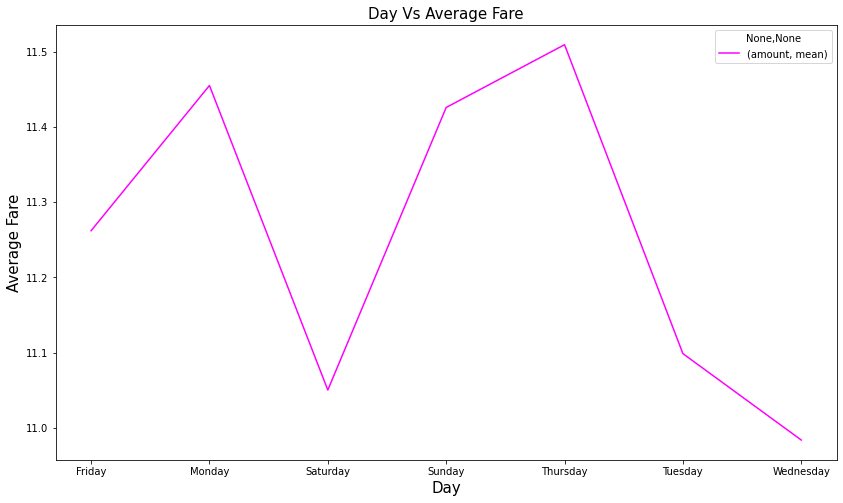

In [29]:
tx2.groupby(tx2["day"]).agg({"amount":["mean"]}).plot(figsize=(14,8),color="magenta")
plt.title("Day Vs Average Fare",fontsize=(15))
plt.xlabel("Day",fontsize=(15))
plt.ylabel('Average Fare',fontsize=(15))
plt.savefig("Day_vs_Average_Fare.jpg")

In [66]:
tx2.pivot_table(index='time_of_day', columns='day', values="no_of_passenger",aggfunc="count") 

day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
time_of_day,,,,,,,
Afternoon,1668,1620,1758,1631,1631,1671,1602
Evening,1727,1633,1602,1243,1729,1650,1698
Morning,1908,1753,1288,1074,1982,1894,1996
Night,2199,1494,2832,2427,1932,1551,1751


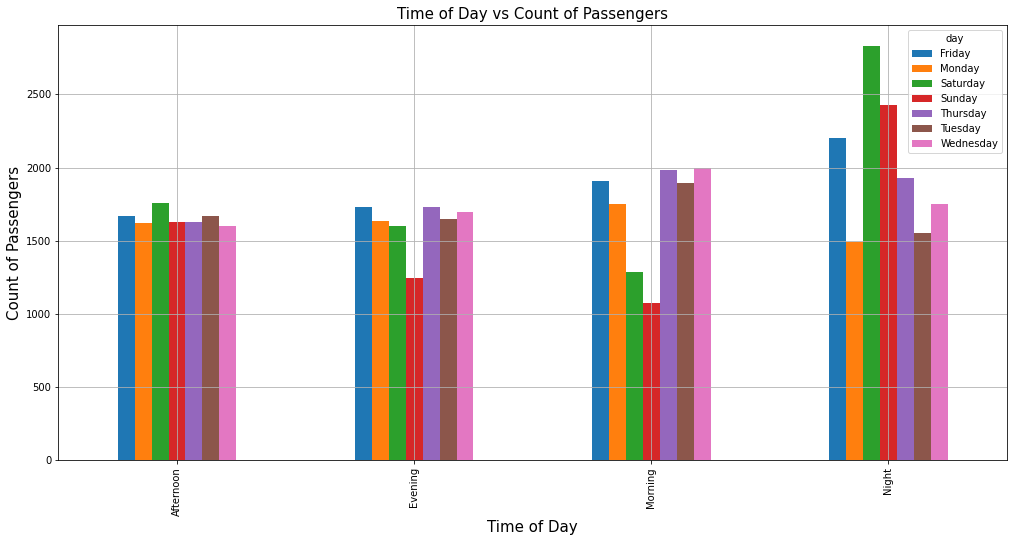

In [68]:
tx2.pivot_table(index='time_of_day', columns='day', values="no_of_passenger",aggfunc="count").plot(figsize=(17,8),kind='bar')
plt.title("Time of Day vs Count of Passengers",fontsize=(15))
plt.xlabel("Time of Day",fontsize=(15))
plt.ylabel('Count of Passengers',fontsize=(15));
plt.grid()
plt.savefig("Time_of_Day_vs_Count_of_Passengers.jpg")

In [69]:
tx2.pivot_table(index='time_of_day', columns='day', values="amount",aggfunc="mean") 

day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
time_of_day,,,,,,,
Afternoon,12.060348,11.692278,11.272452,11.637204,11.999957,11.674710,11.801017
Evening,10.741482,10.833399,10.668620,11.214916,11.240220,11.025412,10.418280
Morning,10.864177,11.364740,10.708509,11.162086,10.884566,10.640312,10.524644
Night,11.410523,11.982758,11.284163,11.508344,11.976310,11.116215,11.308738


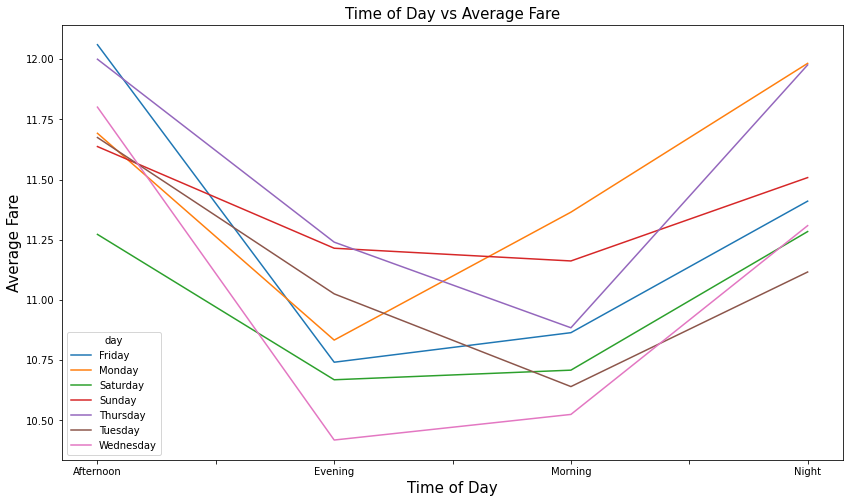

In [31]:
tx2.pivot_table(index='time_of_day', columns='day', values="amount",aggfunc="mean").plot(figsize=(14,8))
plt.title("Time of Day vs Average Fare",fontsize=(15))
plt.xlabel("Time of Day",fontsize=(15))
plt.ylabel('Average Fare',fontsize=(15))
plt.savefig("Time_of_Day_vs_Average_Fare.jpg")

In [72]:
tx2.pivot_table(index="day",values= "Distance_Travel",aggfunc="mean") 

,Distance_Travel
day,
Friday,0.033239
Monday,0.035954
Saturday,0.033871
Sunday,0.036556
Thursday,0.034173
Tuesday,0.033094
Wednesday,0.032113


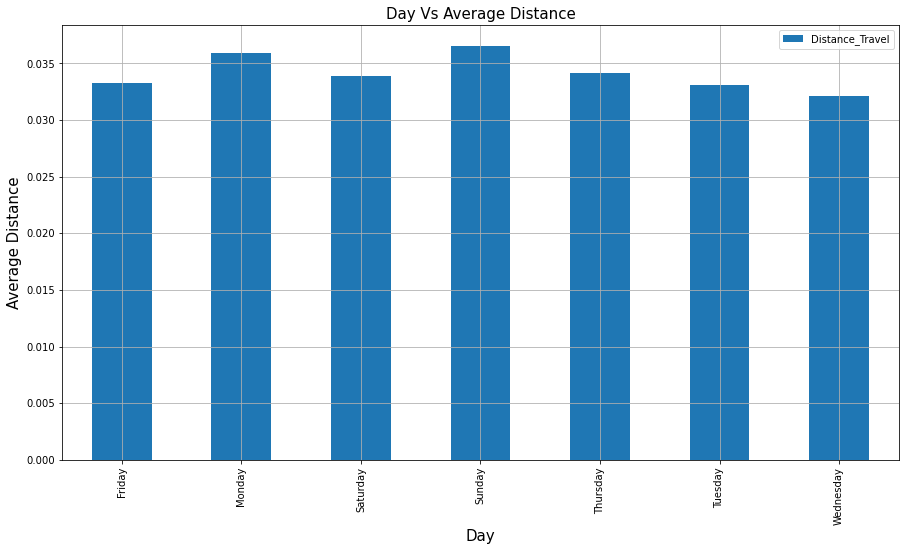

In [32]:
tx2.pivot_table(index="day",values= "Distance_Travel",aggfunc="mean").plot(figsize=(15,8),kind='bar')
plt.title("Day Vs Average Distance",fontsize=(15))
plt.xlabel("Day",fontsize=(15))
plt.ylabel('Average Distance',fontsize=(15));
plt.grid()
plt.savefig("Day Vs Average Distance.jpg")

In [73]:
tx2.pivot_table(index="year",values= "no_of_passenger",aggfunc="count") 


,no_of_passenger
year,
2009,7611
2010,7458
2011,7624
2012,7812
2013,7666
2014,7390
2015,3383


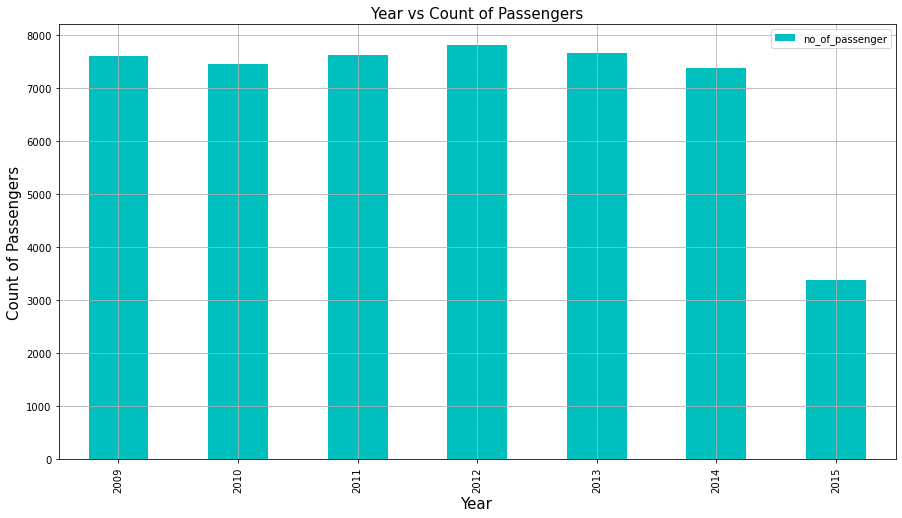

In [33]:
tx2.pivot_table(index="year",values= "no_of_passenger",aggfunc="count").plot(figsize=(15,8), kind='bar',color='c')
plt.title("Year vs Count of Passengers",fontsize=(15))
plt.xlabel("Year",fontsize=(15))
plt.ylabel('Count of Passengers',fontsize=(15));
plt.grid()
plt.savefig("Year vs Count of Passengers.jpg")

In [74]:
tx2.pivot_table(index="year",columns="day",values="no_of_passenger",aggfunc="count")

day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
year,,,,,,,
2009,1179,1032,1138,959,1162,1042,1099
2010,1178,920,1097,990,1127,1061,1085
2011,1185,1042,1168,934,1104,1053,1138
2012,1169,1026,1183,1061,1197,1052,1124
2013,1147,1048,1191,996,1129,1085,1070
2014,1121,984,1137,993,1078,1016,1061
2015,523,448,566,442,477,457,470


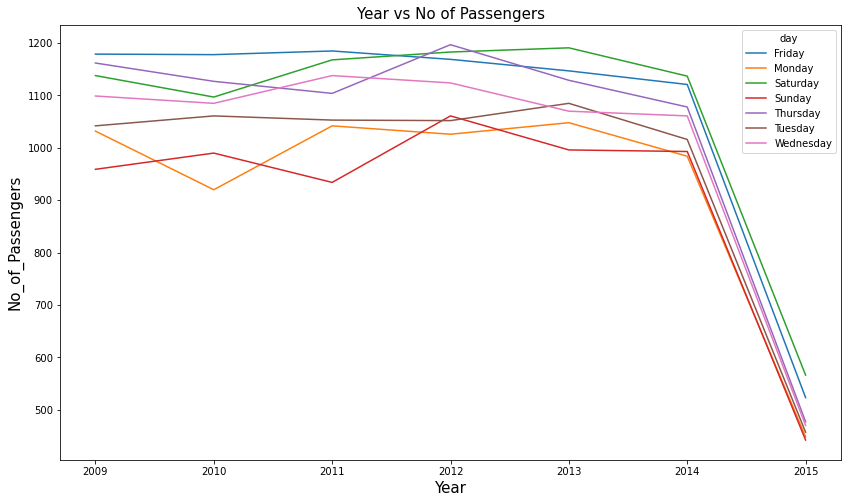

In [34]:
tx2.pivot_table(index="year",columns="day",values="no_of_passenger",aggfunc="count").plot(figsize=(14,8))
plt.title("Year vs No of Passengers",fontsize=(15))
plt.xlabel("Year",fontsize=(15))
plt.ylabel('No_of_Passengers',fontsize=(15))
plt.savefig("Year vs No of Passengers.jpg")


In [75]:
tx2.select_dtypes(include='O').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48944 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   unique_id    48944 non-null  object
 1   Time         48944 non-null  object
 2   Zone         48944 non-null  object
 3   time_of_day  48944 non-null  object
 4   day          48944 non-null  object
dtypes: object(5)
memory usage: 2.2+ MB


In [76]:
tx2.drop(columns=["unique_id","Time","Zone","date","min","second","date_time_of_pickup","X1","X2","Y1","Y2"],inplace =True)

In [37]:
# 1: Yes
# 0: No
# Is_Weekend - if day_no between (0,6) : 1
#              else i.e (1 to 5): 0
# Is_starting_of_month - day of month between (1-10)
# Is_middle_of_month - day of month between (15-20)
# Is_end_of_month - day of month between (20-31)


In [77]:
## here time_of_day and day is objective so convert it in a dummy form
tx2.head(3)

,amount,no_of_passenger,Distance_Travel,hours,year,day_of_the_month,time_of_day,day,day_no
0,4.5,1,0.009436,17,2009,15,Evening,Monday,0
1,16.9,1,0.079696,16,2010,5,Afternoon,Tuesday,1
2,5.7,2,0.013674,0,2011,18,Night,Thursday,3


In [78]:
tx3 = pd.get_dummies(tx2,columns=["time_of_day","day"]) #Dummy Creation

In [80]:
tx3.head(6)

,amount,no_of_passenger,Distance_Travel,hours,year,day_of_the_month,day_no,time_of_day_Afternoon,time_of_day_Evening,time_of_day_Morning,time_of_day_Night,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,4.5,1,0.009436,17,2009,15,0,0,1,0,0,0,1,0,0,0,0,0
1,16.9,1,0.079696,16,2010,5,1,1,0,0,0,0,0,0,0,0,1,0
2,5.7,2,0.013674,0,2011,18,3,0,0,0,1,0,0,0,0,1,0,0
3,7.7,1,0.025340,4,2012,21,5,0,0,0,1,0,0,1,0,0,0,0
4,5.3,1,0.019470,7,2010,9,1,0,0,1,0,0,0,0,0,0,1,0
5,12.1,1,0.038675,9,2011,6,3,0,0,1,0,0,0,0,0,1,0,0


In [83]:
tx3["Is_Weekend"] =np.where(tx3["day_no"].isin ([0,6]),1,0)
tx3["Is_starting_of_month"] = np.where(tx3["day_of_the_month"].isin ([1,2,3,4,5,6,7,8,9,10]),1,0)
tx3["Is_middle_of_month"] = np.where(tx3["day_of_the_month"].isin (range(11,21)),1,0)
tx3["Is_end_of_month"] = np.where(tx3["day_of_the_month"].isin (range(21,32)),1,0)
tx3["Is_leap_year"] = np.where((tx3["year"]%4 == 0),1,0)

In [84]:
tx3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48944 entries, 0 to 49999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount                 48944 non-null  float64
 1   no_of_passenger        48944 non-null  int64  
 2   Distance_Travel        48944 non-null  float64
 3   hours                  48944 non-null  int64  
 4   year                   48944 non-null  int64  
 5   day_of_the_month       48944 non-null  int64  
 6   day_no                 48944 non-null  int64  
 7   time_of_day_Afternoon  48944 non-null  uint8  
 8   time_of_day_Evening    48944 non-null  uint8  
 9   time_of_day_Morning    48944 non-null  uint8  
 10  time_of_day_Night      48944 non-null  uint8  
 11  day_Friday             48944 non-null  uint8  
 12  day_Monday             48944 non-null  uint8  
 13  day_Saturday           48944 non-null  uint8  
 14  day_Sunday             48944 non-null  uint8  
 15  da

### (3) Applying Model

In [86]:
y = tx3["amount"]
X = tx3.drop(columns=["amount"])

In [90]:
# checking Correlation...
corr_data=X.corr()

In [89]:
pd.set_option("precision",3)
corr_data.style.background_gradient(cmap="coolwarm")

,no_of_passenger,Distance_Travel,hours,year,day_of_the_month,day_no,time_of_day_Afternoon,time_of_day_Evening,time_of_day_Morning,time_of_day_Night,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,Is_Weekend,Is_starting_of_month,Is_middle_of_month,Is_end_of_month,Is_leap_year
no_of_passenger,1.000,0.016,0.014,-0.006,0.007,0.048,-0.006,0.015,-0.050,0.038,0.004,-0.013,0.038,0.031,-0.024,-0.023,-0.014,0.013,-0.006,-0.003,0.009,-0.003
Distance_Travel,0.016,1.000,-0.034,0.026,-0.000,0.008,-0.005,-0.031,-0.033,0.064,-0.009,0.019,-0.002,0.025,0.001,-0.010,-0.021,0.034,-0.000,0.003,-0.003,0.002
hours,0.014,-0.034,1.000,0.005,-0.007,-0.091,0.037,0.426,-0.405,-0.048,0.006,0.029,-0.028,-0.097,0.027,0.036,0.025,-0.052,0.006,-0.001,-0.004,-0.002
year,-0.006,0.026,0.005,1.000,-0.011,0.006,-0.010,-0.002,0.003,0.008,-0.005,0.003,0.010,0.006,-0.007,-0.001,-0.005,0.006,0.008,0.003,-0.011,0.061
day_of_the_month,0.007,-0.000,-0.007,-0.011,1.000,0.008,0.010,-0.010,-0.001,0.001,0.005,-0.001,0.009,0.002,-0.008,-0.003,-0.005,0.001,-0.808,-0.015,0.818,-0.004
day_no,0.048,0.008,-0.091,0.006,0.008,1.000,-0.002,-0.039,-0.090,0.124,0.211,-0.606,0.427,0.587,-0.007,-0.416,-0.216,-0.018,-0.008,0.004,0.003,0.005
time_of_day_Afternoon,-0.006,-0.005,0.037,-0.010,0.010,-0.002,1.000,-0.305,-0.315,-0.356,-0.014,0.012,-0.002,0.018,-0.012,0.010,-0.009,0.022,-0.004,-0.008,0.012,-0.008
time_of_day_Evening,0.015,-0.031,0.426,-0.002,-0.010,-0.039,-0.305,1.000,-0.310,-0.350,-0.000,0.019,-0.016,-0.033,0.007,0.013,0.010,-0.010,0.008,0.002,-0.010,-0.000
time_of_day_Morning,-0.050,-0.033,-0.405,0.003,-0.001,-0.090,-0.315,-0.310,1.000,-0.362,0.011,0.024,-0.070,-0.067,0.029,0.034,0.038,-0.033,-0.001,0.006,-0.005,-0.001
time_of_day_Night,0.038,0.064,-0.048,0.008,0.001,0.124,-0.356,-0.350,-0.362,1.000,0.003,-0.052,0.083,0.078,-0.022,-0.054,-0.037,0.019,-0.003,-0.000,0.003,0.008


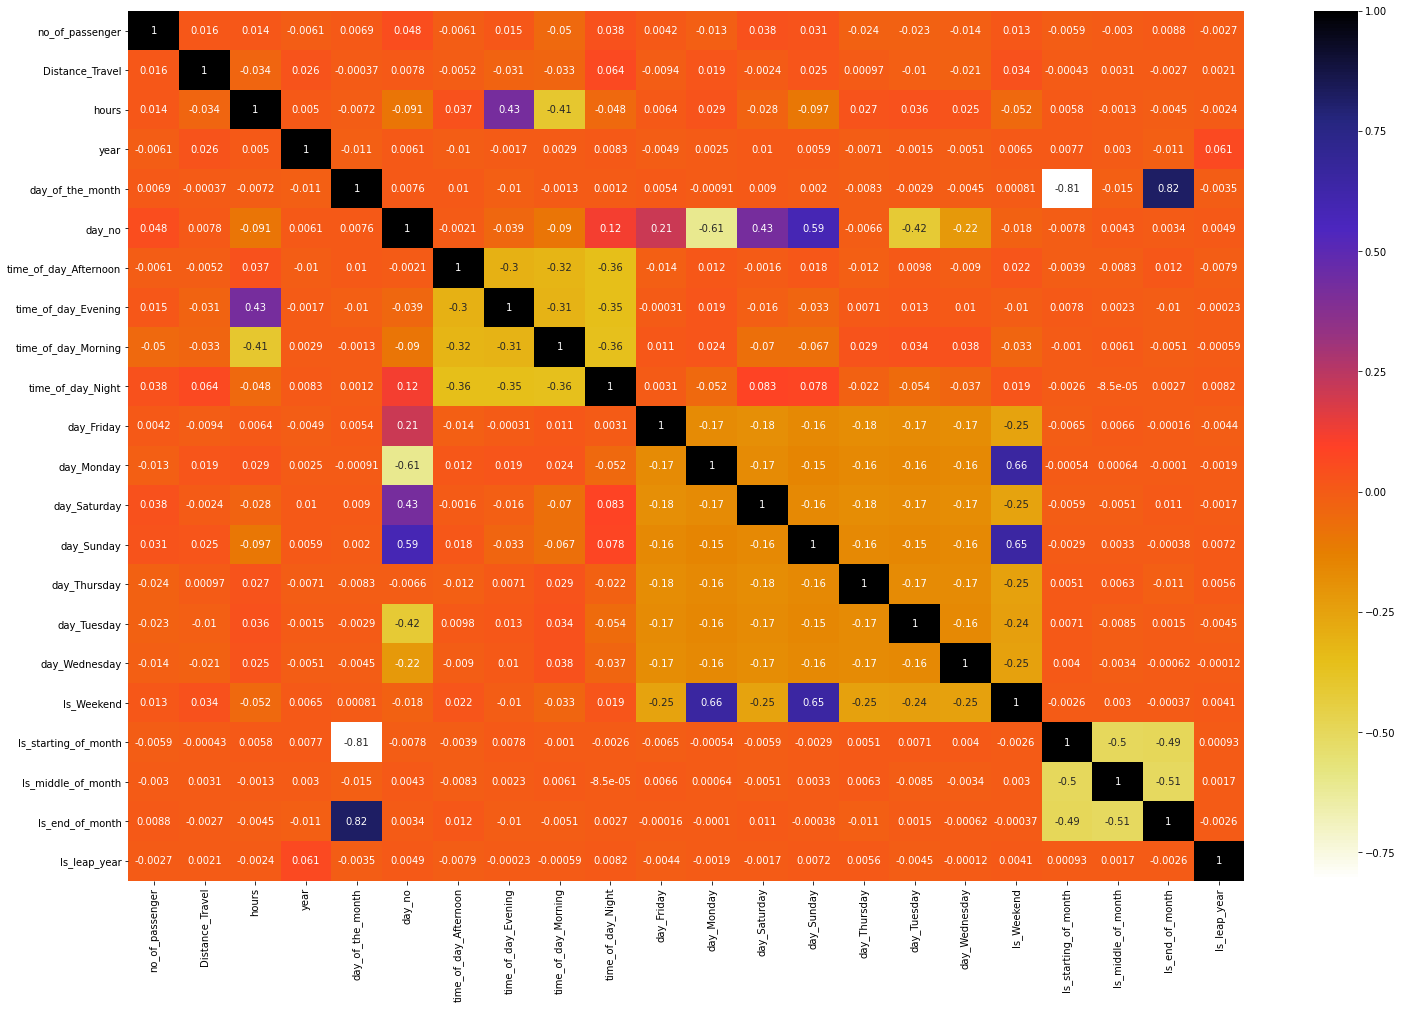

In [95]:
#Using Pearson Correlation.......
plt.figure(figsize=(25,16))
sns.heatmap(corr_data, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

#### Splitting the Data into Train and Test

In [96]:
X_train,X_test,y_train,y_test =train_test_split(X,y, test_size = 0.2 , random_state = 1)

In [97]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39155 entries, 15614 to 33714
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   no_of_passenger        39155 non-null  int64  
 1   Distance_Travel        39155 non-null  float64
 2   hours                  39155 non-null  int64  
 3   year                   39155 non-null  int64  
 4   day_of_the_month       39155 non-null  int64  
 5   day_no                 39155 non-null  int64  
 6   time_of_day_Afternoon  39155 non-null  uint8  
 7   time_of_day_Evening    39155 non-null  uint8  
 8   time_of_day_Morning    39155 non-null  uint8  
 9   time_of_day_Night      39155 non-null  uint8  
 10  day_Friday             39155 non-null  uint8  
 11  day_Monday             39155 non-null  uint8  
 12  day_Saturday           39155 non-null  uint8  
 13  day_Sunday             39155 non-null  uint8  
 14  day_Thursday           39155 non-null  uint8  
 15

In [105]:
print("X_train",X_train.shape,"X_test",X_test.shape,"y_train",y_train.shape,"y_test",y_test.shape)

X_train (39155, 22) X_test (9789, 22) y_train (39155,) y_test (9789,)


#### Using RandomForest Regressor

In [98]:
rf2 = RandomForestRegressor()
rf2.fit(X_train,y_train)
print("Train R2", rf2.score(X_train,y_train))
print("Test R2",rf2.score(X_test,y_test))

Train R2 0.9739104452210822
Test R2 0.8054064594732022


In [99]:
param = {"n_estimators":[20,50],"criterion":['mse'] ,"max_depth": [3,5],"min_samples_split":[2,4],
                "min_samples_leaf":[2,4]}

rf3 = RandomForestRegressor()
Grid_search = GridSearchCV(estimator = rf3, param_grid=param,cv=5,verbose=1,n_jobs=-1)
Grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   26.6s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.0min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [100]:
print("Train R2", Grid_search.score(X_train,y_train))
print("Test R2",Grid_search.score(X_test,y_test))


Train R2 0.8252630541985462
Test R2 0.8174909999630328


In [102]:
print("for train_data",Grid_search.predict(X_train))
print("for test_data",Grid_search.predict(X_test))

for train_data [ 9.09932575 13.18628349 11.13421655 ...  6.8040129   6.6844043
  7.99732848]
for test_data [15.98566371 10.90168097  5.30691686 ...  6.83448267  7.83625756
  8.22250652]


In [101]:
print("MAE of Train: ", np.mean(np.abs((y_train-Grid_search.predict(X_train))) ))
print("MAE of Test: ", np.mean(np.abs((y_test-Grid_search.predict(X_test))) ))
print("RMSE of Train: ", np.sqrt(np.mean((y_train-Grid_search.predict(X_train))**2) ))
print("RMSE of Test: ", np.sqrt(np.mean((y_test-Grid_search.predict(X_test))**2) ))

MAE of Train:  2.080843707880316
MAE of Test:  2.1169401200212294
RMSE of Train:  3.747507890233903
RMSE of Test:  3.813061095172934
